# Lending Club Case Study

## Problem Statement
Lending Club, a consumer finance marketplace, connects borrowers seeking loans with investors aiming to lend money for returns. The company specializes in offering various types of loans to urban customers. When a loan application is received, the company must decide whether to approve or reject the loan based on the applicant's profile. Two key risks are associated with this decision-making process:

1. **Missed Business Opportunity:**
Rejecting applicants who are likely to repay the loan can lead to a loss of potential profit from interest payments.

2. **Credit Loss:**
Approving loans for applicants who default leads to financial losses, as the borrower fails to repay the loan principal and interest.

The primary objective of this exercise is to minimize the credit loss, which is the largest source of financial risk. In this dataset, borrowers labeled as charged-off represent defaulters.

The aim of the analysis is to identify patterns and factors that indicate whether a borrower is likely to default. This insight will enable the company to:

- Reduce financial losses by rejecting high-risk applications.
- Improve decision-making for approving loans.
- Optimize lending to maximize profits and minimize risks.


## Objectives

The company seeks to achieve the following:

1. **Identification of Risky Applicants:**
Use exploratory data analysis (EDA) to identify applicants likely to default. These insights will allow the company to develop data-driven policies for managing loan approvals, amounts, or interest rates.

2. **Driving Factors Analysis:**
Understand the key variables (driver variables) that influence loan defaults. These could include consumer attributes (e.g., income, credit history) or loan-specific factors (e.g., interest rate, loan amount).

3. **Risk Mitigation Strategy:**
Utilize the analysis to craft recommendations that will reduce the company's credit loss.



## Data Understanding

The provided dataset includes historical information on loan applicants and their repayment behavior. It focuses on:

1. **Loan characteristics:** Loan amount, interest rates, purpose, etc.
2. **Borrower characteristics:** Income, employment, debt-to-income ratio, etc.
3. **Loan outcome:** Fully Paid, Charged-Off, or Current.

### Details obtained from data dictionary

**1. Loan Status (Target Variable):**
- Fully Paid: The borrower successfully repaid the loan (principal + interest).
- Charged-Off: The borrower defaulted and has not repaid the loan.
- Current: The borrower is still in the repayment process (ongoing loan).
For the analysis, **rows with Current status will be excluded, as they do not provide conclusive evidence of repayment behavior.**

**2. Loan Approval Process:**
- Borrower requests a loan (loan_amnt).
- The approver evaluates risk and determines the approved amount (funded_amnt).
- Investors finalize the funding amount (funded_amnt_inv).

## Importing all required dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading data

Data is being loaded from the loan.csv dataet added in the given repository

In [4]:
loan = pd.read_csv('loan.csv')

In [5]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic Information

In [7]:
loan.shape

(39717, 111)

In [8]:
# Basic infomation about the dataframe
print(loan.info())
# Number of missing values
print('Number of missing values:',loan.isnull().sum().sum())
# Number of unique values
print('Number of unique values:',loan.nunique().sum())
# Number of duplicates
print('Number of duplicates:',loan.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


In [9]:
# Describing the dataframe
print(loan.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

### Loading data dictionary

In [11]:
loan_dict = pd.read_excel('Data_Dictionary.xlsx')
loan_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


## Data Cleanup

First we will analyse the data to find columns which are null 

In [13]:
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

### Non Contributing columns

- There are multiple columns with **NA values** only. The **columns will be dropped**. 
    - `('mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit')`
  There are multiple columns which will be dropped.
- There are multiple columns where the **values are only zero**
- There are columns where the **values are constant**.
- There are columns where the **value is constant but the other values are NA**.
- There are columns where **more than 60% of data is empty**
- Column which **have unique values** dont contribute to the analysis
- Columns which are **discriptive and text** dont contribute to analysis
- Columns which **represent data post the approval of loan**

In [15]:
# Dropping columns which still have more than 60% of null values as they won't contribute to our overall analysis
cols_to_drop = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 60].tolist()
print(cols_to_drop)
print(len(cols_to_drop))

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

In [16]:
# Dropping all these columns
loan = loan.drop(cols_to_drop, axis=1)
print(loan.shape)

(39717, 54)


In [17]:
# These are other columns which don't contribute to the analysis based on the description provided above
irrevelant_cois = ['delinq_2yrs', 'inq_last_6mths', 'title', 'emp_title', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id', 'url', 'desc', 'zip_code','earliest_cr_line']

In [18]:
loan.drop(irrevelant_cois, axis = 1, inplace = True)

In [19]:
loan.shape

(39717, 24)

Checking for columns with unique values

In [21]:
loan.nunique()

loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
pymnt_plan                  1
purpose                    14
addr_state                 50
dti                      2868
initial_list_status         1
policy_code                 1
application_type            1
acc_now_delinq              1
delinq_amnt                 1
pub_rec_bankruptcies        3
dtype: int64

In [22]:
# Removing columns with unique values
remove_columns_list = []
for i in loan.columns:
    if loan[i].nunique() == 1:
        remove_columns_list.append(i)
    
loan.drop(remove_columns_list, axis = 1, inplace = True)

In [23]:
loan.shape

(39717, 18)

## Dropping records with loan_status = 'current'
As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [25]:
loan = loan[loan.loan_status != 'Current']
loan.shape

(38577, 18)

In [26]:
# Dropping all columns with all zero values
loan = loan.loc[:, (loan != 0).any(axis=0)]

## Correcting data format

In [28]:
loan = loan.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

In [29]:
# Convert the term column into an integer from a string
loan['term'] = loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [30]:
# Convert int_rate to  float by removing the "%" character
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [31]:
# Converting the the colums with date or months from string object to DateTime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')
loan['issue_year']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.year
loan['issue_month']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.month

In [32]:
# Round off the values of key float fields to 2 decimal place
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    loan[c] = loan[c].apply(lambda x: round(x,2))

loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   funded_amnt           38577 non-null  float64       
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            37544 non-null  object        
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

In [35]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12


## Fixing null values

In [38]:
# Checking for missing values across the dataframe
print(loan.isnull().sum().sort_values(ascending=False))

emp_length              1033
pub_rec_bankruptcies     697
loan_amnt                  0
verification_status        0
issue_year                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
annual_inc                 0
funded_amnt                0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
issue_month                0
dtype: int64


In [39]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan.emp_length.value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


In [41]:
# Dropping rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
loan = loan[loan['emp_length'].notna()]

In [42]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    35312
1.0     1530
2.0        5
Name: count, dtype: int64


In [43]:
# As the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.
# Inserting 0 for null values in pub_rec_bankruptcies column
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

In [44]:
print(loan.isnull().sum())

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
issue_year              0
issue_month             0
dtype: int64


In [45]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [46]:
# Mapping employment length with the respective number of years in int
loan.emp_length=loan.emp_length.apply(lambda x: x.replace('+','').replace(' years','').replace(' year','').replace('< 1','0')).astype(int)

In [47]:
loan.emp_length.unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7])

## Removing outliers

Using plot visualisations to view and remove outliers

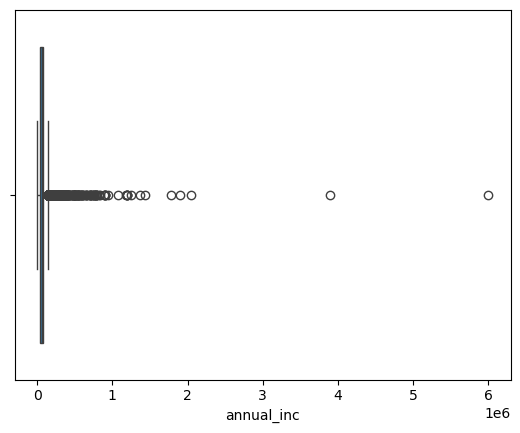

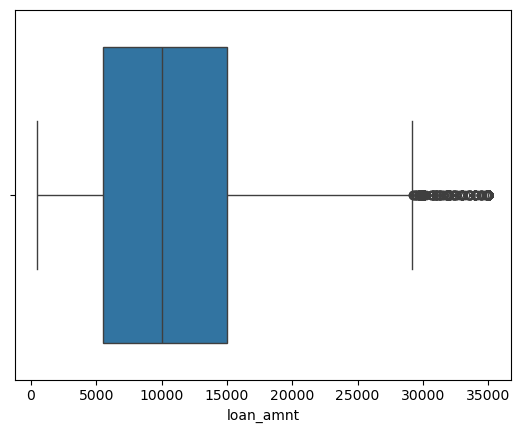

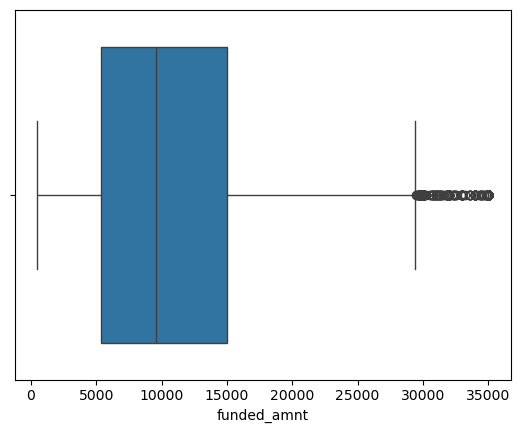

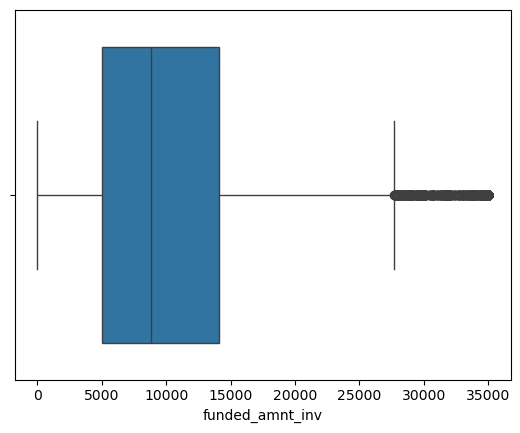

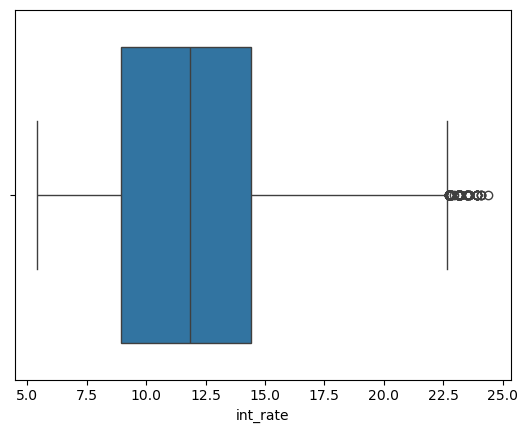

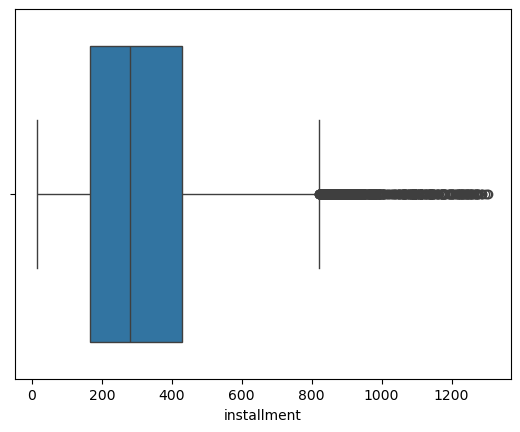

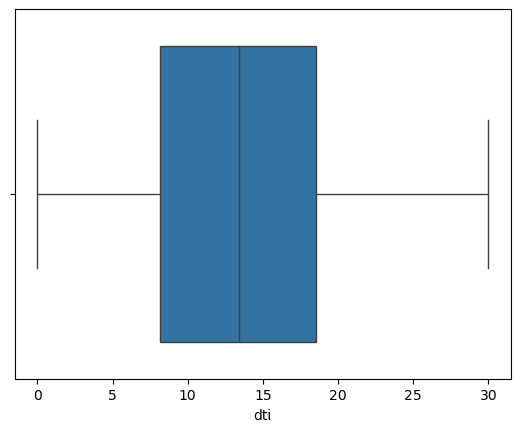

In [49]:
for col in ['annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    sns.boxplot(data=loan, x=col)
    plt.show()

We can see that there are a few outliers that are present in our columns. To treat these outliers we will be using IQR.
- IQR = 75th Quartile - 25th Quartile
- Lower Bound = 25th Quartile - 1.5 * IQR
- Upper Bound = 75th Quartile + 1.5 * IQR

In [51]:
def test(x,y):
    print('Total rows dropped for c: ',x ,'  asre ', y)

test(20,30)

Total rows dropped for c:  20   asre  30


In [52]:
# Creating common functions to get and drop outlier values
def get_iqr(df, column):
    q25 = df[column].quantile(0.25)
    q75 = df[column].quantile(0.75)
    iqr = q75 - q25
    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr
    return {'q1': q25, 'q3': q75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}

def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Total rows dropped for column: ', column, ' are: ', old_rows - new_rows)
    return new_df

In [53]:
for col in ['annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    loan = drop_outlier(loan, col)

Total rows dropped for column:  annual_inc  are:  1739
Total rows dropped for column:  loan_amnt  are:  807
Total rows dropped for column:  funded_amnt  are:  151
Total rows dropped for column:  funded_amnt_inv  are:  483
Total rows dropped for column:  int_rate  are:  52
Total rows dropped for column:  installment  are:  724
Total rows dropped for column:  dti  are:  0


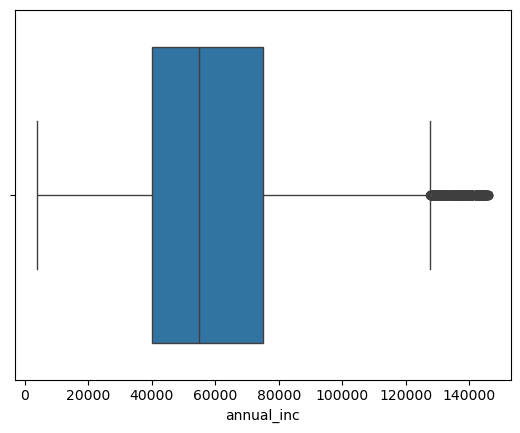

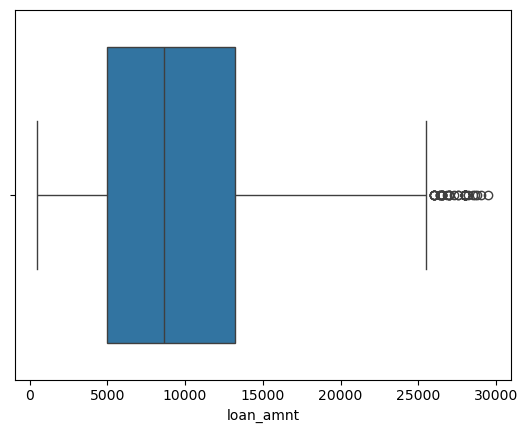

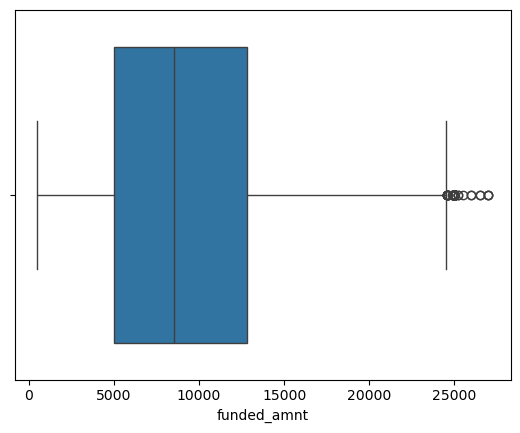

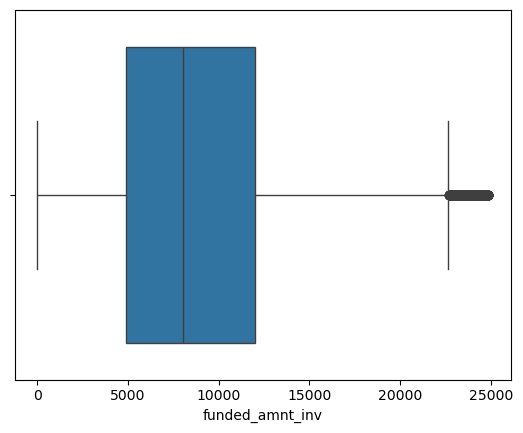

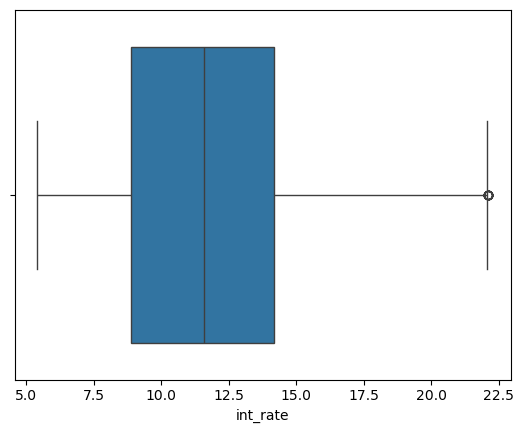

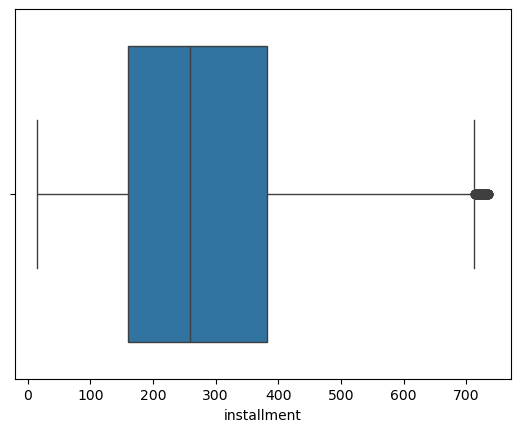

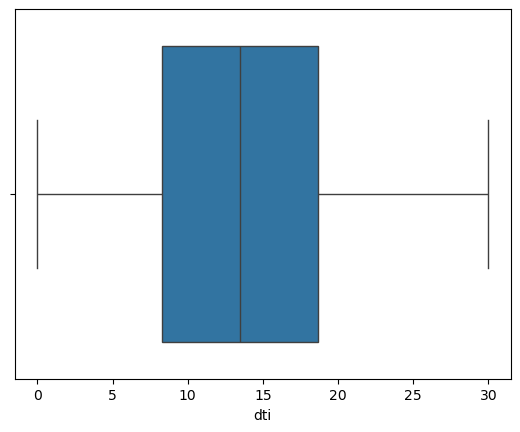

In [54]:
for col in ['annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    sns.boxplot(data=loan, x=col)
    plt.show()

## Univariate Analysis

We have two types of variables present for our analysis:

**1. Ordered categorical:** 'grade', 'term', 'emp_length', 'issue_year'

**2. Unordered categorical:** 'addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid'

**3. Quantitative:** 'annual_inc', 'int_rate', 'loan_amnt', 'funded_amnt', 'dti', 'installment'

### Ordered categorical

Text(0.5, 1.0, 'Plot for Grade')

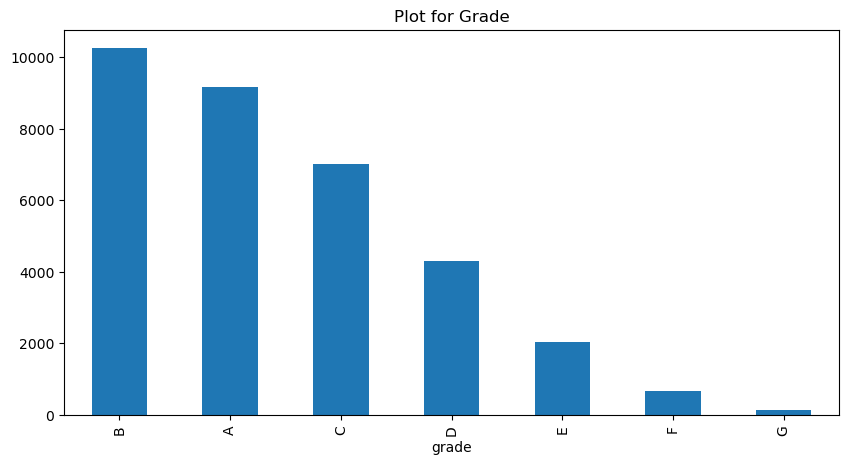

In [243]:
# Grade
plt.figure(figsize=(10,5))
loan['grade'].value_counts().plot.bar()
plt.title('Plot for Grade')

**Observation:** Majority of loan application counts fall under the catogory of **Grade B**

Text(0.5, 1.0, 'Plot for Sub Grade')

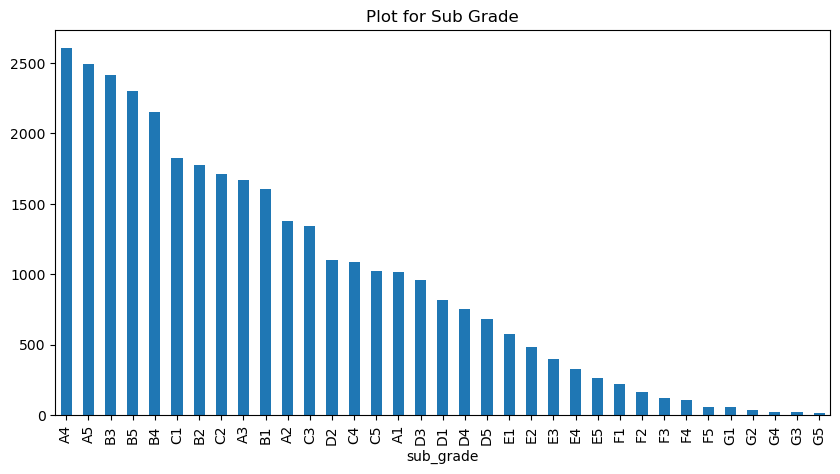

In [245]:
# Sub-Grade
plt.figure(figsize=(10,5))
loan['sub_grade'].value_counts().plot.bar()
plt.title('Plot for Sub Grade')

**Observation:** Sub grade **A4, A5, B3** have majority of the borrowers

Text(0.5, 1.0, 'Plot for Term')

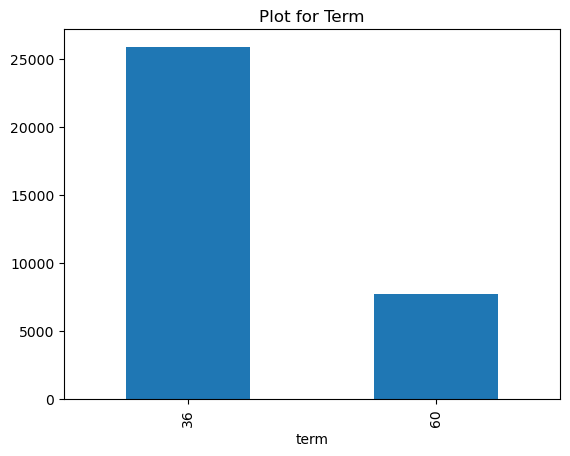

In [247]:
# Term
loan['term'].value_counts().plot.bar()
plt.title('Plot for Term')

**Observation:** Majority of loan application are for a term of **36 months**

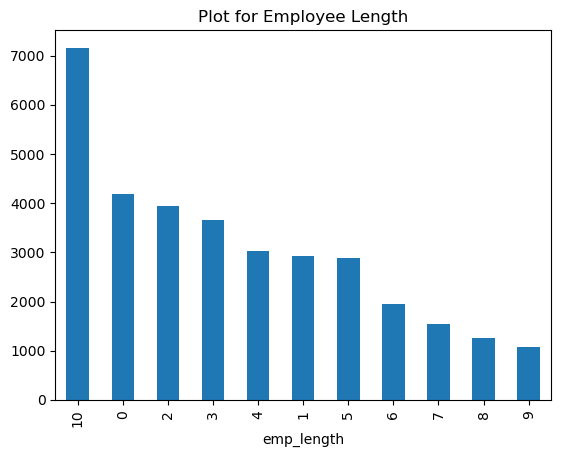

In [287]:
# Emp length
loan['emp_length'].value_counts().plot.bar()
plt.title('Plot for Employee Length')
plt.show()

**Observation:** Majority of loan application are taken by people with over **10 years** of employment

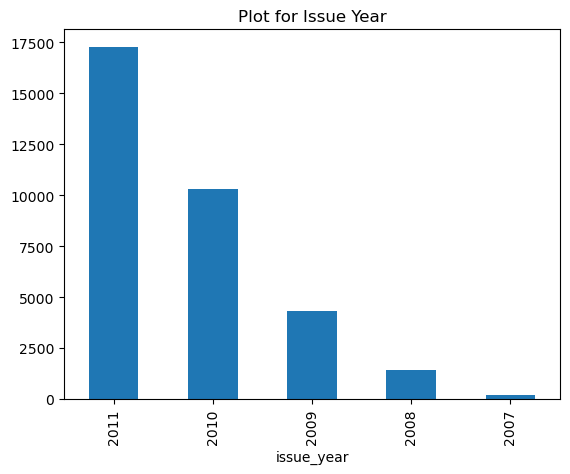

In [290]:
# Issue Year
loan['issue_year'].value_counts().plot.bar()
plt.title('Plot for Issue Year')
plt.show()

**Observation:** Number of loans have increased over each year with 2011 being highest

### Unordered categorical

Text(0.5, 1.0, 'Plot for State')

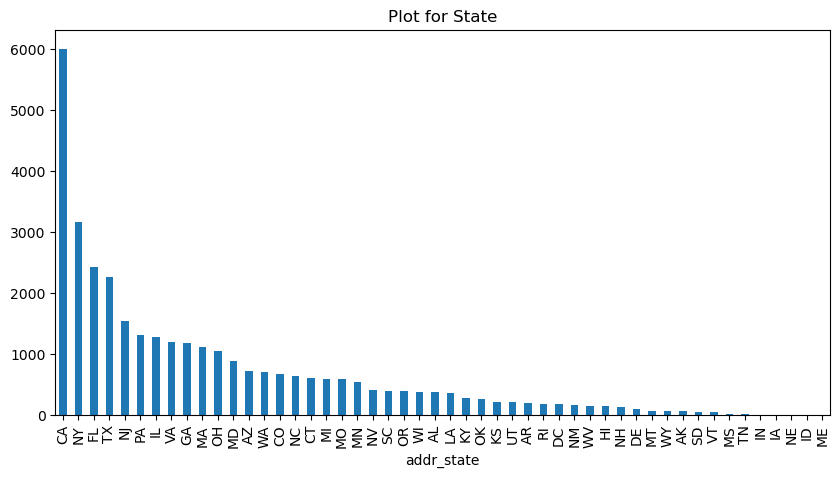

In [257]:
# State
plt.figure(figsize=(10,5))
loan['addr_state'].value_counts().plot.bar()
plt.title('Plot for State')

**Observation:** **CA has the most loan applications** while NY, FL and TX also have a significant amount

Text(0.5, 1.0, 'Plot for Purpose')

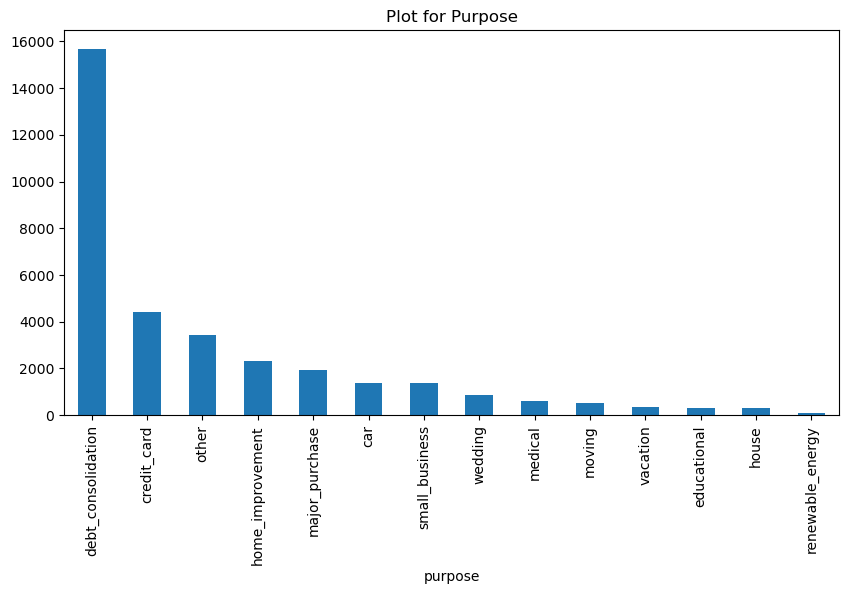

In [260]:
# Purpose
plt.figure(figsize=(10,5))
loan['purpose'].value_counts().plot.bar()
plt.title('Plot for Purpose')

**Observation:** Majority of loan application are for **Debt Consolidation**

Text(0.5, 1.0, 'Plot for Home Ownership Status')

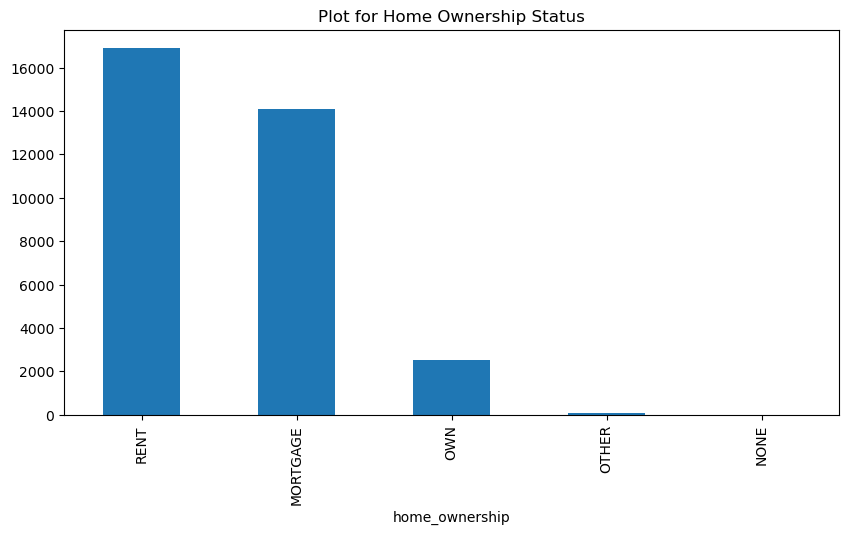

In [263]:
# Home Ownership
plt.figure(figsize=(10,5))
loan['home_ownership'].value_counts().plot.bar()
plt.title('Plot for Home Ownership Status')

**Observation:** Majority of applicants home ownership status is either **Rent or Mortgage**

Text(0.5, 1.0, 'Plot for Overall Loan Status')

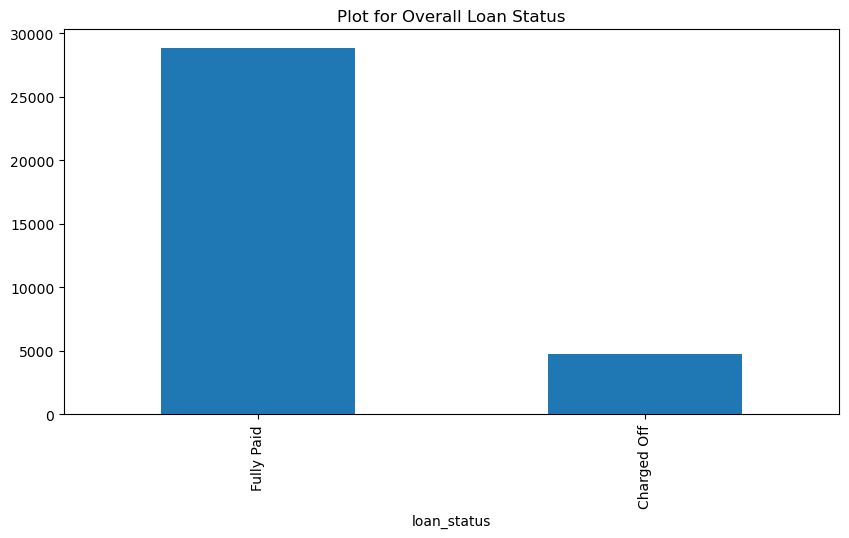

In [266]:
# Loan Status
plt.figure(figsize=(10,5))
loan['loan_status'].value_counts().plot.bar()
plt.title('Plot for Overall Loan Status')

**Observation:** Majority of people have fully paid there loans

### Quantitative

count     33588.000000
mean      59940.962537
std       27368.982920
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      145992.000000
Name: annual_inc, dtype: float64


Text(0.5, 1.0, 'Plot for Annual Income')

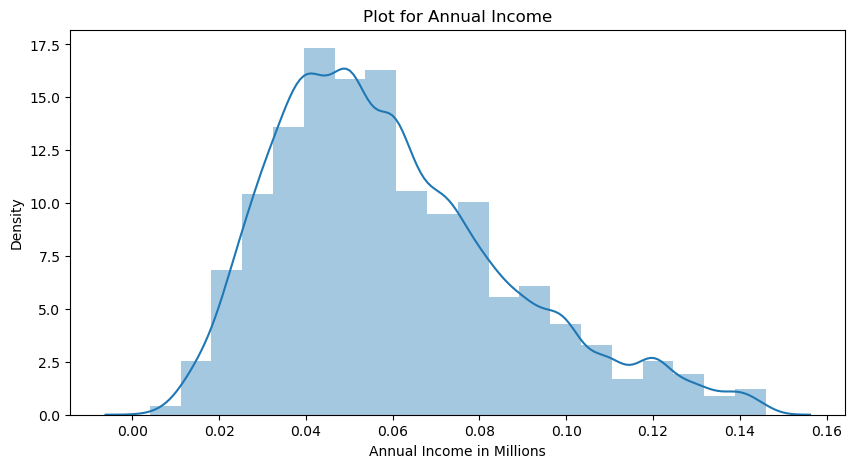

In [270]:
# Annual Income
plt.figure(figsize=(10,5))
sns.distplot(x=loan['annual_inc']/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Plot for Annual Income')
print(loan['annual_inc'].describe())
plt.title('Plot for Annual Income')

**Observation:** Majority of borrowers have comparatively lower annual income.

count    33588.000000
mean        11.723761
std          3.552346
min          5.420000
25%          8.900000
50%         11.580000
75%         14.170000
max         22.110000
Name: int_rate, dtype: float64


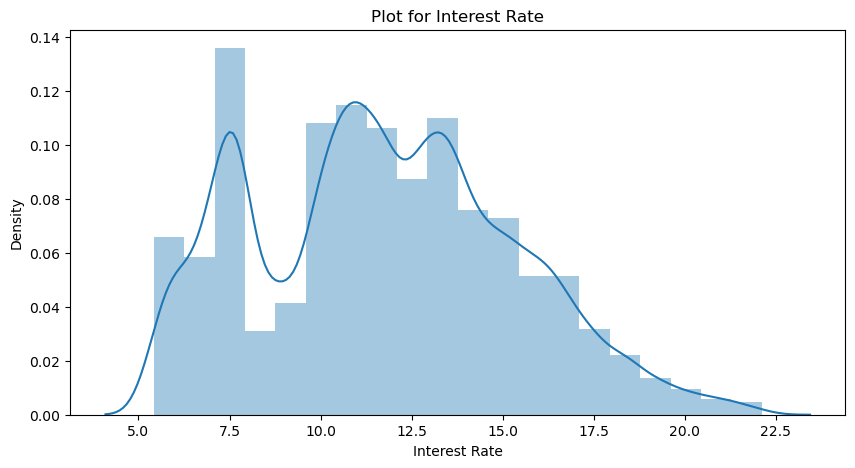

In [272]:
# Interest rate
plt.figure(figsize=(10,5))
sns.distplot(loan['int_rate'],kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Plot for Interest Rate')
print(loan['int_rate'].describe())

**Observation:** Majority of borrowers have loan at an interest rate between 10-15%

count    33588.000000
mean      9655.822764
std       5628.561359
min        500.000000
25%       5000.000000
50%       8625.000000
75%      13200.000000
max      29500.000000
Name: loan_amnt, dtype: float64


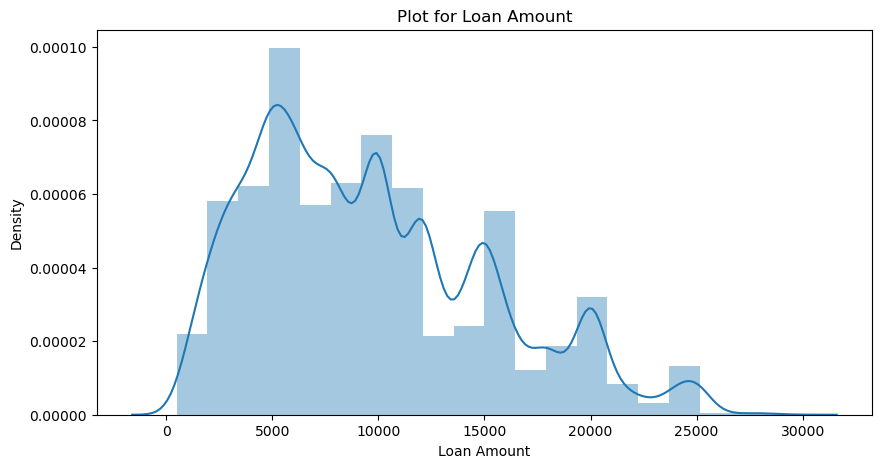

In [276]:
# Loan Amount
plt.figure(figsize=(10,5))
sns.distplot(loan['loan_amnt'],kde=True,bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.title('Plot for Loan Amount')
print(loan['loan_amnt'].describe())

**Observation:** Majority of loans amounts range between 5000-10000

count    33588.000000
mean      9427.415297
std       5367.603975
min        500.000000
25%       5000.000000
50%       8500.000000
75%      12800.000000
max      27000.000000
Name: funded_amnt, dtype: float64


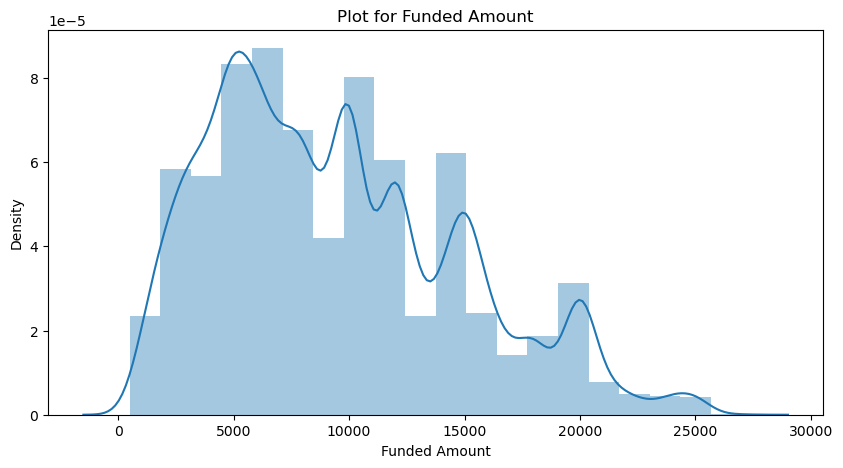

In [279]:
# Funded Amount
plt.figure(figsize=(10,5))
sns.distplot(loan['funded_amnt'],kde=True,bins=20)
plt.xlabel('Funded Amount')
plt.ylabel('Density')
plt.title('Plot for Funded Amount')
print(loan['funded_amnt'].describe())

**Observation:** Majority of people have fully paid there loans

count    33588.000000
mean        13.398615
std          6.660696
min          0.000000
25%          8.290000
50%         13.500000
75%         18.680000
max         29.990000
Name: dti, dtype: float64


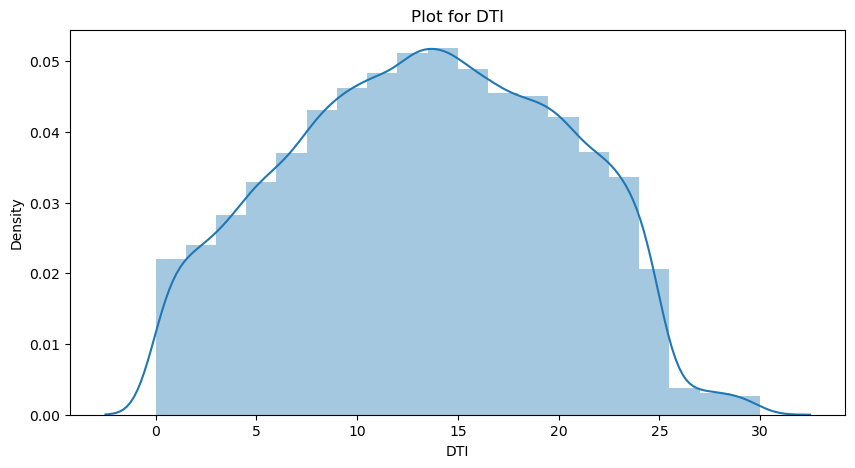

In [282]:
# Loan Status
plt.figure(figsize=(10,5))
sns.distplot(loan['dti'],kde=True,bins=20)
plt.xlabel('DTI')
plt.ylabel('Density')
plt.title('Plot for DTI')
print(loan['dti'].describe())

**Observation:** Majority of borrowers have dti ratio ranging from 8-20 with max upto 30

count    33588.000000
mean       282.756071
std        157.291712
min         15.690000
25%        160.050000
50%        258.465000
75%        381.260000
max        734.830000
Name: installment, dtype: float64


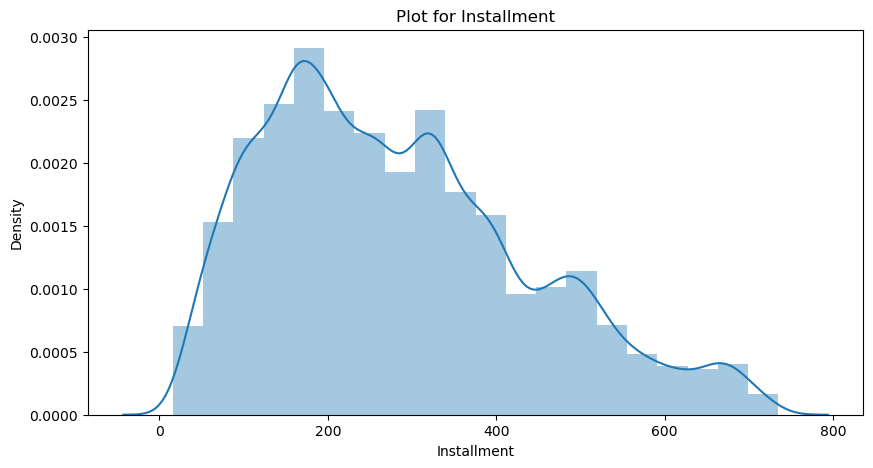

In [285]:
# Loan Status
plt.figure(figsize=(10,5))
sns.distplot(loan['installment'],kde=True,bins=20)
plt.xlabel('Installment')
plt.ylabel('Density')
plt.title('Plot for Installment')
print(loan['installment'].describe())

**Observation:** Majority of people have installments ranging from 180-400

## Univariate Analysis Summary

### Customer Demographics
- Majority of the loan applicants are in the range of 10K - 40K annual income
- Majority of the home owner status are in status of RENT and MORTGAGE
- Highest loan applications are of type debt_consolidation
- CA state has the maximum amount of loan applications
- Majority of the debt to income is in the range of 8 to 20 going at the max to 30
- Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years

### Loan Demographics
- Highest loan amount applications fall in the range of 5k to 10k
- Majority of the interest rate is in the range of 5% to 16% going at the max to 22%
- Majority of the loan applications counts are in the term of 36 months
- Majority of loan application counts fall under the catogory of Grade B
- Majority of people have fully paid there loans

## Bivariate Analysis

#### Grade vs. Loan Status

Text(0.5, 1.0, 'Grade vs. Loan Status')

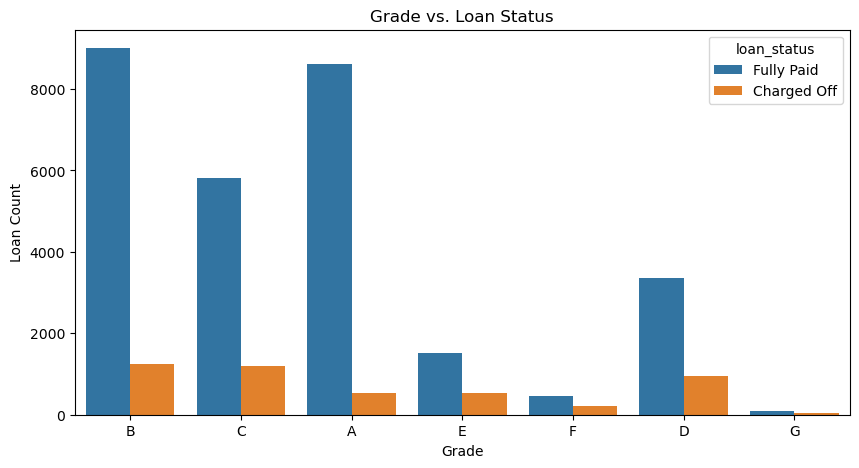

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['grade'], hue=loan['loan_status'], data=loan)
plt.xlabel('Grade')
plt.ylabel('Loan Count')
plt.title('Grade vs. Loan Status')

**Observation:** The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans

#### Sub Grade vs. Loan Status

Text(0.5, 1.0, 'Sub Grade vs. Loan Status')

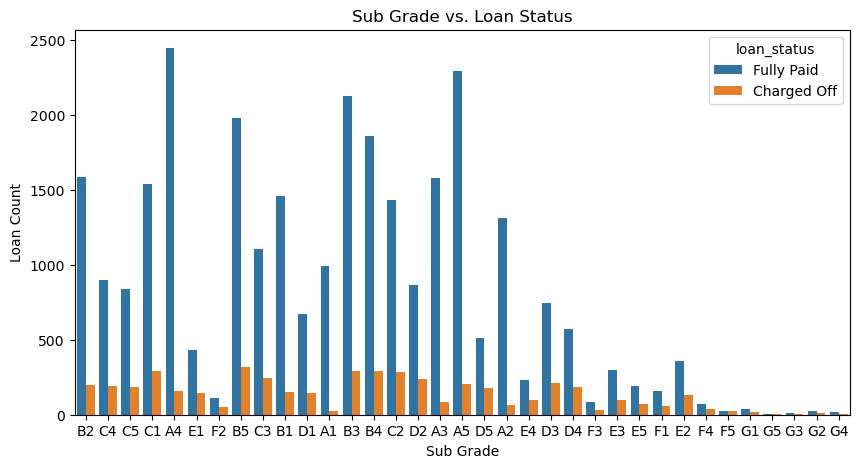

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['sub_grade'], hue=loan['loan_status'], data=loan)
plt.xlabel('Sub Grade')
plt.ylabel('Loan Count')
plt.title('Sub Grade vs. Loan Status')

**Observation:** Loan applicants belonging to Sub Grades B3, B4, and B5 are most likely to Charge off

#### Term vs. Loan Status

Text(0.5, 1.0, 'Term vs. Loan Status')

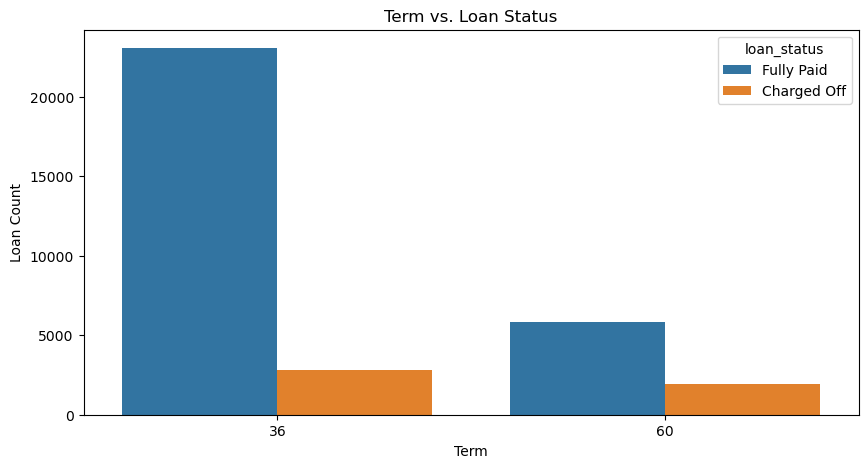

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['term'], hue=loan['loan_status'], data=loan)
plt.xlabel('Term')
plt.ylabel('Loan Count')
plt.title('Term vs. Loan Status')

In [110]:
# Since we will require to check the charge off percent at multiple comparisons, creating a common function for the same
def charged_off_percent(loan, col, val):
    charged_off = loan[(loan[col] == val) & (loan['loan_status'] == 'Charged Off')][col].value_counts().get(val, 0)
    total = loan[loan[col] == val][col].value_counts().get(val, 0)
    return 0 if total == 0 else round((charged_off / total) * 100, 2)

In [111]:
# Calculating percentage of default based on loan status
charged_off_percent_36_m = round((loan[(loan['loan_status'] == 'Charged Off')]['term'].value_counts()[36])/(loan[loan['term'] == 36]['term'].value_counts()[36])*100,2)
charged_off_percent_60_m = round((loan[(loan['loan_status'] == 'Charged Off')]['term'].value_counts()[60])/(loan[loan['term'] == 60]['term'].value_counts()[60])*100,2)
print('Charged off pecentage for people taking loan for 60 months - ', charged_off_percent(loan, 'term', 60),'%')
print('Charged off pecentage for people taking loan for 36 months - ', charged_off_percent(loan, 'term', 36),'%')

Charged off pecentage for people taking loan for 60 months -  25.0 %
Charged off pecentage for people taking loan for 36 months -  10.86 %


**Observation:** The borrowers taking loan for 60 months are more likely to default as compared to those taking for 36 months

#### Employment Length vs. Loan Status

Text(0.5, 1.0, 'Employment Length vs. Loan Status')

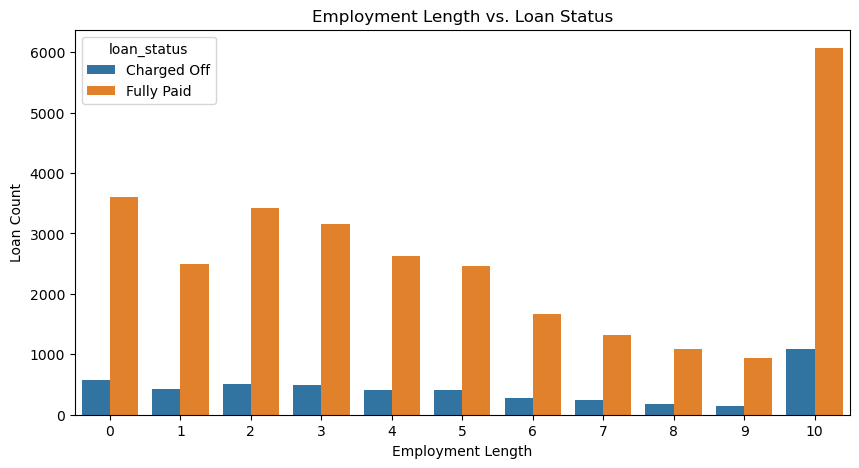

In [118]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['emp_length'], hue=loan['loan_status'], data=loan)
plt.xlabel('Employment Length')
plt.ylabel('Loan Count')
plt.title('Employment Length vs. Loan Status')

In [119]:
for y in range(11):
    print('Charged off percentage for emp length ', y, ' years is: ',  charged_off_percent(loan, 'emp_length', y), '%')

Charged off percentage for emp length  0  years is:  13.93 %
Charged off percentage for emp length  1  years is:  14.32 %
Charged off percentage for emp length  2  years is:  13.02 %
Charged off percentage for emp length  3  years is:  13.5 %
Charged off percentage for emp length  4  years is:  13.52 %
Charged off percentage for emp length  5  years is:  14.19 %
Charged off percentage for emp length  6  years is:  14.06 %
Charged off percentage for emp length  7  years is:  15.24 %
Charged off percentage for emp length  8  years is:  13.85 %
Charged off percentage for emp length  9  years is:  12.89 %
Charged off percentage for emp length  10  years is:  15.27 %


**Observation:** The loan applicants with more than 10 years of employment has the highest number of defaulters

#### Loan Year vs. Loan Status

Text(0.5, 1.0, 'Loan Year vs. Loan Status')

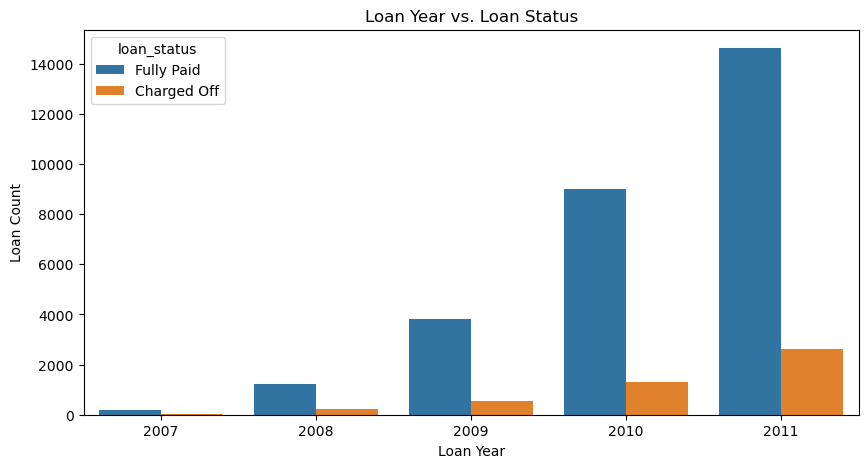

In [123]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['issue_year'], hue=loan['loan_status'], data=loan)
plt.xlabel('Loan Year')
plt.ylabel('Loan Count')
plt.title('Loan Year vs. Loan Status')

**Observation:** The loan applicants in year 2011 have defaulted the most

#### Purpose vs. Loan Status

Text(0.5, 1.0, 'Purpose vs. Loan Status')

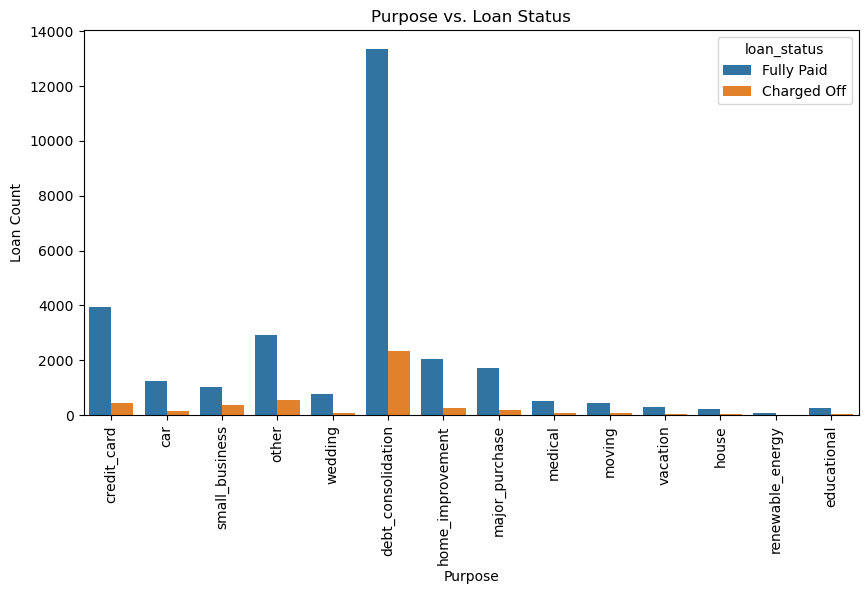

In [130]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['purpose'], hue=loan['loan_status'], data=loan)
plt.xlabel('Purpose')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.title('Purpose vs. Loan Status')

In [131]:
for val in loan['purpose'].unique():
    print('Charged off percentage for purpose ', val, ' years is: ',  charged_off_percent(loan, 'purpose', val), '%')

Charged off percentage for purpose  credit_card  years is:  10.32 %
Charged off percentage for purpose  car  years is:  10.89 %
Charged off percentage for purpose  small_business  years is:  26.71 %
Charged off percentage for purpose  other  years is:  15.68 %
Charged off percentage for purpose  wedding  years is:  9.84 %
Charged off percentage for purpose  debt_consolidation  years is:  14.82 %
Charged off percentage for purpose  home_improvement  years is:  11.8 %
Charged off percentage for purpose  major_purchase  years is:  10.22 %
Charged off percentage for purpose  medical  years is:  15.57 %
Charged off percentage for purpose  moving  years is:  15.61 %
Charged off percentage for purpose  vacation  years is:  14.54 %
Charged off percentage for purpose  house  years is:  16.95 %
Charged off percentage for purpose  renewable_energy  years is:  19.28 %
Charged off percentage for purpose  educational  years is:  16.33 %


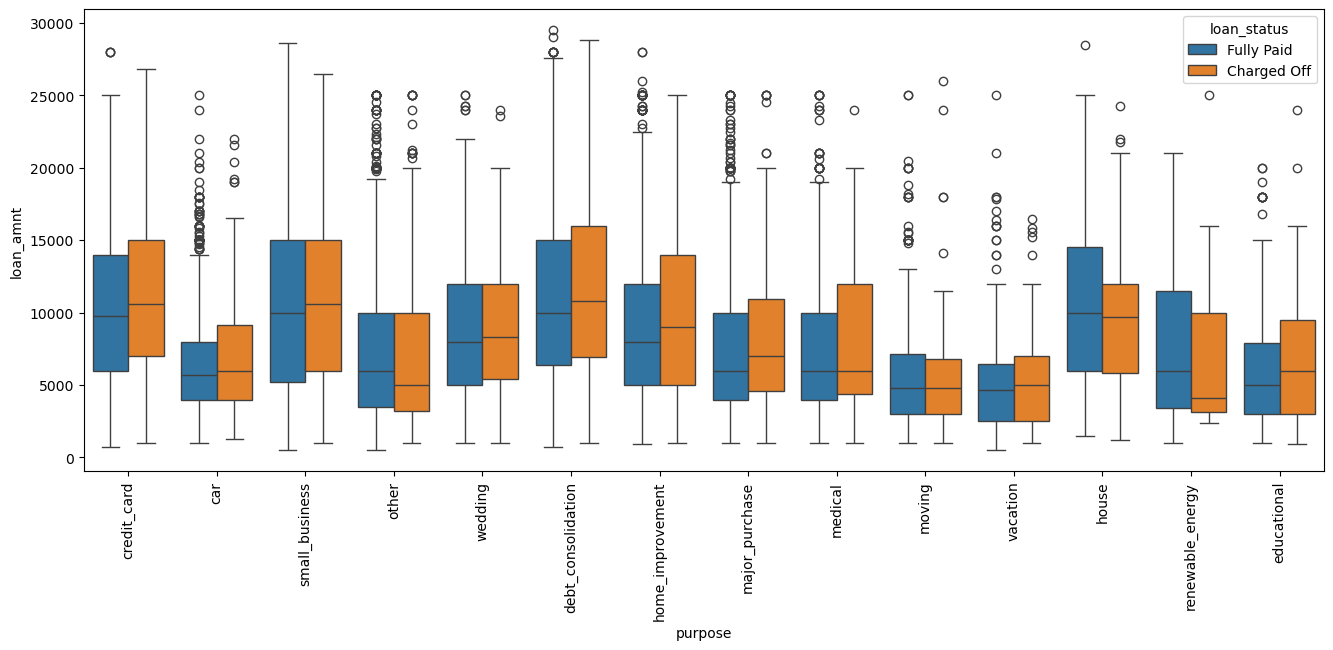

In [237]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.purpose, hue=loan.loan_status)
plt.xticks(rotation=90)
plt.show()

**Observation:** The loan applicants for **debt_consolidation category have highest number of defaulters** while the **highest percentage of defaulters are in small_business category.**

#### Home Ownership vs. Loan Status

Text(0.5, 1.0, 'Home Ownership vs. Loan Status')

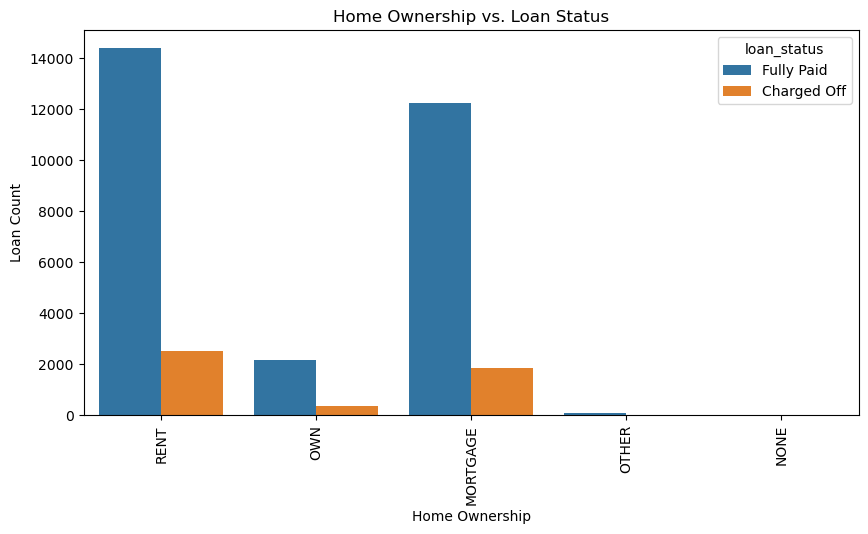

In [134]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['home_ownership'], hue=loan['loan_status'], data=loan)
plt.xlabel('Home Ownership')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.title('Home Ownership vs. Loan Status')

In [135]:
for val in loan['home_ownership'].unique():
    print('Charged off percentage for home ownership type ', val, ' years is: ',  charged_off_percent(loan, 'home_ownership', val), '%')

Charged off percentage for home ownership type  RENT  years is:  14.85 %
Charged off percentage for home ownership type  OWN  years is:  14.35 %
Charged off percentage for home ownership type  MORTGAGE  years is:  13.16 %
Charged off percentage for home ownership type  OTHER  years is:  17.78 %
Charged off percentage for home ownership type  NONE  years is:  0.0 %


**Observation:** The loan applicants for home ownership type **RENT** have defaulted the most

**Home Ownership and Loan Amount**

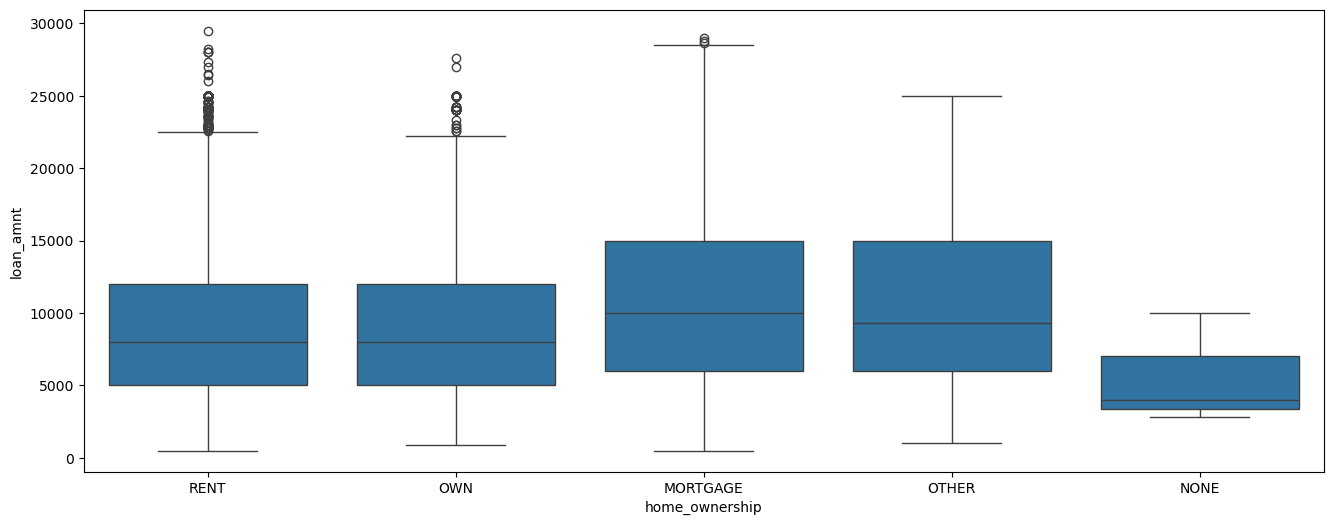

In [232]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan['loan_amnt'], x=loan['home_ownership'])
plt.show()

**Observation:** The loan applicants for home ownership type **MORTGAGE** have higher loan amount while having a similar perctage of defaulters as for type RENT.

#### Address State vs. Loan Status

Text(0.5, 1.0, 'Address State vs. Loan Status')

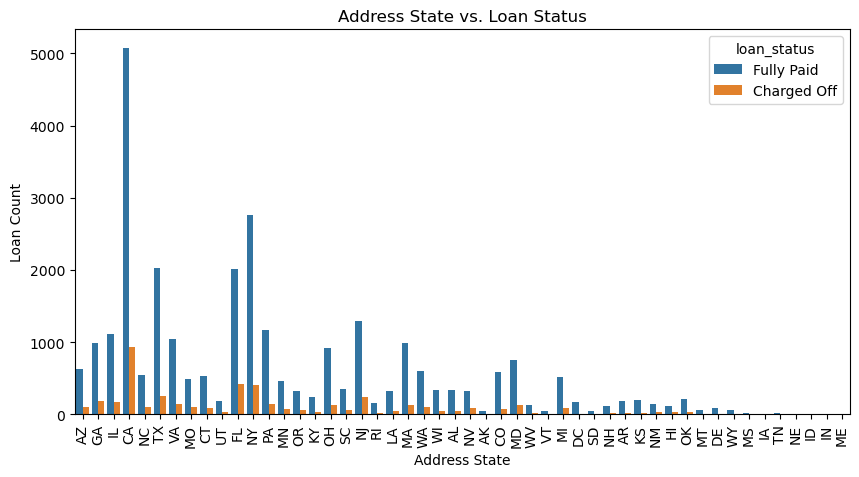

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan['addr_state'], hue=loan['loan_status'], data=loan)
plt.xlabel('Address State')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.title('Address State vs. Loan Status')

In [143]:
for val in loan['addr_state'].unique():
    print('Charged off percentage for purpose ', val, ' years is: ',  charged_off_percent(loan, 'addr_state', val), '%')

Charged off percentage for purpose  AZ  years is:  13.66 %
Charged off percentage for purpose  GA  years is:  16.02 %
Charged off percentage for purpose  IL  years is:  13.47 %
Charged off percentage for purpose  CA  years is:  15.57 %
Charged off percentage for purpose  NC  years is:  15.53 %
Charged off percentage for purpose  TX  years is:  11.03 %
Charged off percentage for purpose  VA  years is:  12.58 %
Charged off percentage for purpose  MO  years is:  16.64 %
Charged off percentage for purpose  CT  years is:  13.5 %
Charged off percentage for purpose  UT  years is:  13.3 %
Charged off percentage for purpose  FL  years is:  17.43 %
Charged off percentage for purpose  NY  years is:  12.8 %
Charged off percentage for purpose  PA  years is:  11.42 %
Charged off percentage for purpose  MN  years is:  13.81 %
Charged off percentage for purpose  OR  years is:  15.99 %
Charged off percentage for purpose  KY  years is:  14.49 %
Charged off percentage for purpose  OH  years is:  12.26 %


**Observation:** The loan applicants for **CA** have highest defaulters.

#### Interest Rate vs. Loan Status

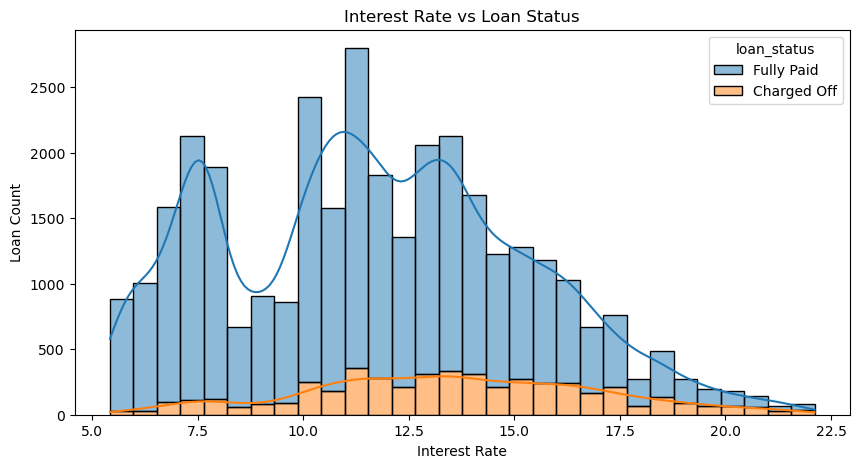

In [146]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan, x='int_rate', hue='loan_status', kde=True, bins=30, multiple='stack')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Count')
plt.title('Interest Rate vs Loan Status')
plt.show()

**Observation:** The loan applicants with interest rate between 10-15% have defaulted the most

#### Loan Amount and Annual Income

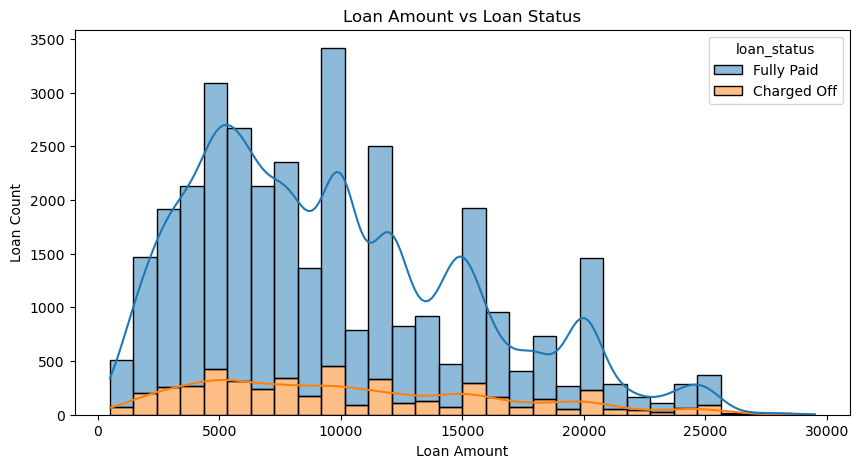

In [152]:
plt.figure(figsize=(10,5))
sns.histplot(x='loan_amnt', hue='loan_status', data=loan, kde=True, bins=30, multiple='stack')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Count')
plt.title('Loan Amount vs Loan Status')
plt.show()

**Observation:** The loan applications for loan amount between 5000-10000 has the most number of defaulters

#### Annual Income and Interest rate

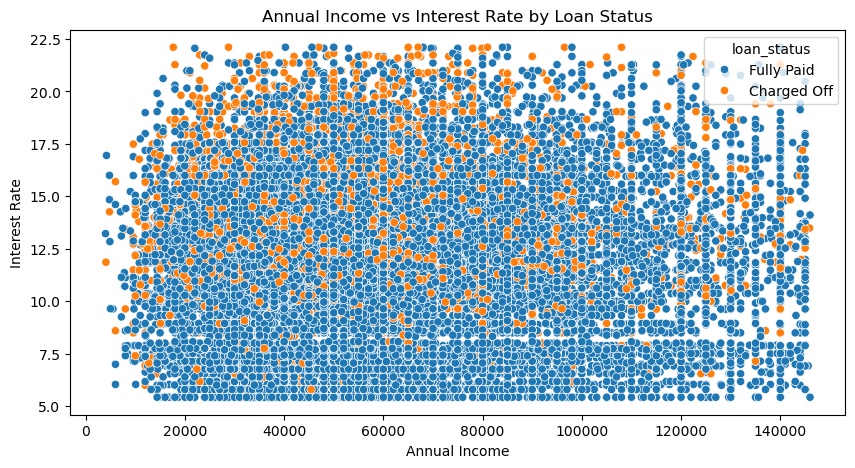

In [159]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=loan['annual_inc'], y=loan['int_rate'], hue=loan['loan_status'], data=loan)
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.title('Annual Income vs Interest Rate by Loan Status')
plt.show()

**Observation:** The loan applicants with low annual income below 70K have higher chance of defaulting if the interest rate is more than 12.5% 

## Bivariate Analysis Summary

### 1. Grade vs. Loan Status
- **Observation:** Borrowers with Grades **B, C, and D** have the highest number of "Charged Off" loans, indicating higher risk among these grades.

### 2. Sub Grade vs. Loan Status
- **Observation:** Sub Grades **B3, B4, and B5** are most prone to defaults, showing finer granularity in risk within Grade B.

### 3. Term vs. Loan Status
- **Observation:** Loans with **60-month terms** show a higher percentage of defaults compared to **36-month terms**, suggesting longer repayment durations increase default risk.

### 4. Employment Length vs. Loan Status
- **Observation:** Borrowers with **more than 10 years of employment** have the highest number of defaulters, possibly due to higher loan eligibility leading to larger loan amounts.

### 5. Loan Year vs. Loan Status
- **Observation:** Loans issued in **2011** have the most defaults, indicating possible macroeconomic factors or underwriting practices during that year.

### 6. Purpose vs. Loan Status
- **Observation:**
  - **Debt consolidation** has the **highest number of defaulters**, reflecting a pattern of risk among borrowers consolidating debts.
  - **Small businesses** have the **highest percentage of defaulters**, highlighting riskier profiles in business loans.

### 7. Home Ownership vs. Loan Status
- **Observation:**
  - Borrowers who **rent** have the **most defaults**, suggesting less financial stability compared to homeowners.
  - Borrowers with **mortgages** have **higher loan amounts** but similar default percentages as renters, indicating moderate risk.

### 8. Address State vs. Loan Status
- **Observation:** Borrowers in **California (CA)** have the highest number of defaults, which may be influenced by larger loan amounts or cost-of-living factors.

### 9. Interest Rate vs. Loan Status
- **Observation:** Borrowers with **interest rates between 10–15%** have the most defaults, implying higher interest rates correlate with increased credit risk.

### 10. Loan Amount vs. Loan Status
- **Observation:** Loan amounts between **$5000–$10000** show the most defaults, indicating that smaller loans may be riskier for specific borrower segments.

### 11. Annual Income and Interest Rate vs. Loan Status
- **Observation:** Borrowers with **annual incomes below $70,000** and **interest rates above 12.5%** are more likely to default, reinforcing the impact of income and interest rates on creditworthiness.


### Key Insights from Bivariate Analysis
1. **High-Risk Borrowers**: Borrowers with **low income**, **higher interest rates**, and **longer loan terms** (60 months) are more prone to defaults.
2. **Purpose Matters**: Loans for **debt consolidation** and **small businesses** exhibit higher default risks.
3. **Loan Grades and Sub-Grades**: Specific grades and sub-grades, especially **B3–B5**, highlight areas requiring stricter underwriting policies.
4. **Demographic Factors**: Employment length, home ownership type, and geographic location (e.g., **CA**) influence default patterns.


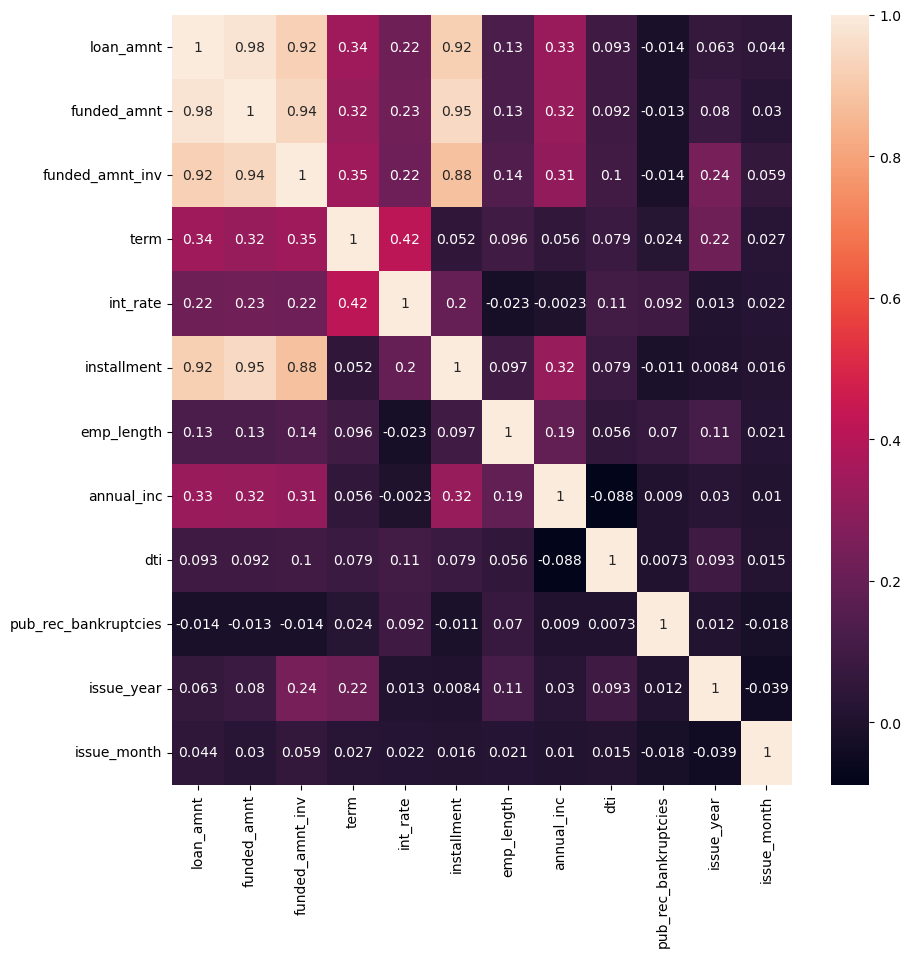

In [165]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan.select_dtypes(include=['float64', 'int64', 'int32']).corr(),annot=True)
plt.show()

### Observation from Correlation Matrix

**Strong Correlation**
- `installment` has a strong correlation with funded_amnt, loan_amnt, and funded_amnt_inv
- `term` has a strong correlation with interest rate
- `annual_inc` has a strong correlation with loan_amount


**Weak Correlation**
- `dti` has weak correlation with most of the fields
- `emp_length` has weak correlation with most of the fields


**Negative Correlation**
- `pub_rec_bankrupticies` has a negative correlation with almost every field
- `annual_inc` has a negative correlation with dti